#**Comparing the Runtimes of Different Clustering Algorithms on Different Biological Networks**



**By Arjun Subramanian, Mahmoud Fakhry, San Davran**





#Abstract


There are numerous biological networks that all need to be handled differently, as they have different sizes and structures. This is why it is necessary to understand the effects that different clustering algorithms have on different biological networks. Therefore, for this experiment, the runtime of different algorithms are tested on biological networks of different sizes and structures. Three algorithms were tested (Girvan-Newman, Louvain, Infomap) on three different biological networks (ecolitfnet.txt, hsmetnet.txt, bladder_cancer_tcga.txt). We found that Louvain had the fastest runtime across all networks, and that Girvan-Newman was faster than Infomap on really small networks but exponentially slower on larger networks possibly due to the effect of the overheard time. Network structure also seems plays a role in runtime, as hsmetnet had the longest runtime for Girvan-Newman, even though this network did not have the largest size.

#Introduction

The algorithms we wanted to compare are Louvain, Girvan-Newman, and Infomap. In this research, our aim is to compare the runtimes of the different clustering algorithms on biological networks of varying sizes.


#Hypotheses
*   **H0**: All algorithms have the same runtime, regardless of network type


*   **HA**: At least one algothirm has a greater efficiency than the others for at least one network 


In [ ]:
!apt-get install libcairo2-dev libjpeg-dev libgif-dev
!pip install pycairo 
import cairo
!pip install python-igraph
import igraph, pandas, matplotlib.pyplot as plt, numpy , random , itertools 
import time

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgif-dev is already the newest version (5.1.9-1).
libgif-dev set to manually installed.
libjpeg-dev is already the newest version (8c-2ubuntu8).
libjpeg-dev set to manually installed.
The following additional packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libffi-dev libglib2.0-dev
  libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev libselinux1-dev
  libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 libcairo2-dev libffi-dev
  libglib2.0-dev libglib2.0-dev-bin liblzo2-2 libmount-dev libpixman-1-dev
  libselinux1-dev libsepol1-dev libxcb-render0-dev libxcb-shm0-dev
0 upgraded, 13 newly installed, 0 to remove and 22 not upgraded.
Need to get 

In [ ]:
import os 
import urllib.request 

urllib.request.urlretrieve('https://csx46.s3-us-west-2.amazonaws.com/ecolitfnet.txt', 'ecolitfnet.txt') 
urllib.request.urlretrieve('https://csx46.s3-us-west-2.amazonaws.com/hsmetnet.txt', 'hsmetnet.txt') 
urllib.request.urlretrieve('https://csx46.s3-us-west-2.amazonaws.com/bladder_cancer_genes_tcga.txt', 'bladder_cancer_genes_tcga.txt')


('bladder_cancer_genes_tcga.txt', <http.client.HTTPMessage at 0x7f6d7f127700>)

In [ ]:
ecolitfnet = pandas.read_csv( "ecolitfnet.txt" , names = [ "source" , "target" ] , sep='\t', lineterminator='\n' ).drop_duplicates() 

hsmetnet = pandas.read_csv( "hsmetnet.txt" , names = [ "source" , "target" ] , sep='\t', lineterminator='\n' ).drop_duplicates() 

bladder_cancer_genes_tcga = pandas.read_csv( "bladder_cancer_genes_tcga.txt" ,  sep='\t' )

In [ ]:
import time
ecoli_list = ecolitfnet.values.tolist()
hsmetnet_list = hsmetnet.values.tolist()
cancer_list = bladder_cancer_genes_tcga.values.tolist()

#Methods

#Girvan-Newman 


Time complexity: O(m$^{2}$n)


Space complexity: O(m+n)

(Note: “m” is edges, “n” is nodes) [4]. 

______

Pseudocode [1]:


Input: A network G = (V, E)


1. Compute the betweenness centrality of all edges in G.
2. Find the edge(s) with the highest betweenness centrality and remove them from G.
3. Recompute the betweenness centrality of all remaining edges in G.
4. Repeat steps 2-3 until all edges have been removed.
5. The resulting disconnected components of G are the communities.


Output: The communities in G.


In [ ]:
def girvan_newman_runtime(graph):
  start_time = time.time()  
  output = graph.community_edge_betweenness()  # Runs the girvan-newman algorithm
  end_time = time.time()  
  runtime = end_time - start_time  
  return runtime

#Louvain 

Time complexity: O(n log(n))


Space complexity: O(m+n)

(Note: “m” is edges, “n” is nodes) [5].

______

Pseudocode [2]:

Input: A network G = (V, E)


1. Initialize each node as a singleton community.
2. Repeat until no further improvement is possible:


*   For each node i, compute the change in modularity if i is removed from its current community.


*   For each node i, move it to the community that results in the maximum increase in modularity.
3. Replace each community in G by a single node representing that community.
4. Construct a new network G' by connecting the nodes in G' with weighted edges representing the total weight of edges between their corresponding communities in G.
5. Return to step 1 with G = G' until no further improvement is possible.


Output: The communities in G.


In [ ]:
def louvain_runtime(graph):
  start_time = time.time()  
  output = graph.community_multilevel()  # Runs the louvain algorithm
  end_time = time.time()  
  runtime = end_time - start_time  
  return runtime

#Infomap 


Time complexity: O(n log(n))


Space complexity: O(m+n)

(Note: “m” is edges, “n” is nodes) [6].

______

Pseudocode [3]:

Input: A network G = (V, E)


1. Initialize each node as a singleton community.
2. While there is a decrease in the Map equation:
*  Perform a random walk on G and record the visited nodes and their frequencies.
*  For each node i, compute the probability of visiting each of its neighboring communities during the random walk.
*  Merge nodes into communities to optimize the Map equation.
*  Replace each community in G by a single node representing that community.
*  Construct a new network G' by connecting the nodes in G' with weighted edges representing the total weight of edges between their corresponding communities in G.
3. Return the final partition of G.


Output: The communities in G.


In [ ]:
def infomap_runtime(graph):
  start_time = time.time()  
  output = graph.community_infomap() # Runs the infomap algorithm
  end_time = time.time()  
  runtime = end_time - start_time  
  return runtime

In [ ]:
# Girvan-Newman
ecoli_graph = igraph.Graph.TupleList(ecoli_list,directed=True)
hsmetnet_graph = igraph.Graph.TupleList(hsmetnet_list,directed=True)
cancer_graph = igraph.Graph.TupleList(cancer_list,directed=True)
rn_gn_ecoli = girvan_newman_runtime(ecoli_graph)
rn_gn_hsmet = girvan_newman_runtime(hsmetnet_graph)
rn_gn_cancer = girvan_newman_runtime(cancer_graph)

In [ ]:
# Louvain
ecoli_graph = igraph.Graph.TupleList(ecoli_list,directed=False)
hsmetnet_graph = igraph.Graph.TupleList(hsmetnet_list,directed=False)
cancer_graph = igraph.Graph.TupleList(cancer_list,directed=False)
rn_lo_ecoli = louvain_runtime(ecoli_graph)
rn_lo_hsmet = louvain_runtime(hsmetnet_graph)
rn_lo_cancer = louvain_runtime(cancer_graph)

In [ ]:
# Infomap
ecoli_graph = igraph.Graph.TupleList(ecoli_list,directed=True)
hsmetnet_graph = igraph.Graph.TupleList(hsmetnet_list,directed=True)
cancer_graph = igraph.Graph.TupleList(cancer_list,directed=True)
rn_in_ecoli = infomap_runtime(ecoli_graph)
rn_in_hsmet = infomap_runtime(hsmetnet_graph)
rn_in_cancer = infomap_runtime(cancer_graph)

#Results

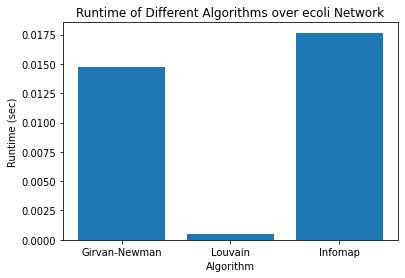

In [ ]:
plt.bar(["Girvan-Newman","Louvain","Infomap"],[rn_gn_ecoli,rn_lo_ecoli,rn_in_ecoli])
plt.xlabel("Algorithm")
plt.ylabel("Runtime (sec)")
plt.title("Runtime of Different Algorithms over Ecoli Network")
plt.show()

In this graph, the three algorithms are being tested on the ecoli network. Infomap had the highest runtime, followed closely by Girvan-Newman, with Louvain having the lowest by a large amount. Notably, all three algorithms had relatively short runtimes for this graph (that came out to mileseconds of runtime). 

*    For the size of the ecoli network graph which the three algorithms were tested on, it has a size of 2,381. 

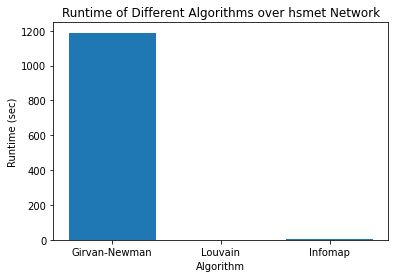

In [ ]:
plt.bar(["Girvan-Newman","Louvain","Infomap"],[rn_gn_hsmet,rn_lo_hsmet,rn_in_hsmet])
plt.xlabel("Algorithm")
plt.ylabel("Runtime (sec)")
plt.title("Runtime of Different Algorithms over hsmet Network")
plt.show()

In this graph, the three algorithms are being run on the hsmet network. Girvan-Newman has an astronomically large runtime, whereas the runtime for Infomap is barely apparent and the runtime for Louvain is not visible (although it did produce a runtime).

*    For the size of the hsmet human metabolic network graph which the three algorithms were tested on, it has a size of 647,637. 

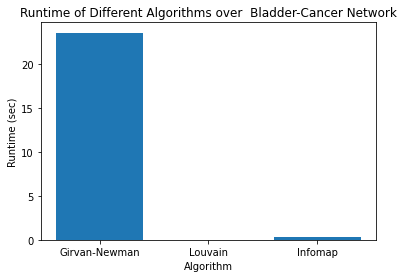

In [ ]:
plt.bar(["Girvan-Newman","Louvain","Infomap"],[rn_gn_cancer,rn_lo_cancer,rn_in_cancer])
plt.xlabel("Algorithm")
plt.ylabel("Runtime (sec)")
plt.title("Runtime of Different Algorithms over  Bladder-Cancer Network")
plt.show()

In this graph, the three algorithms were run on the bladder-cancer network. Girvan-Newman and the largest runtime by a large proportion, followed by Infomap, with Louvain having the fastest runtime.

*    For the size of the bladder cancer network graph which the three algorithms were tested on, it has a size of 31,352,889. 

#Conclusion


From the results, we can see that the Louvain Algorithm had the fastest runtime by far for all networks. In contrast, the Girvan-Newman Algorithm performed slowest on two of the three networks (performing with a faster runtime than the Infomap algorithm for the ecoli network), suggesting that it runs better on smaller networks, but had enourmously large runtime for the hsmet network, the largest runtime produced from this experiemnt, even though hsmet was only the second largest network. This indicates that the structure of the network might play a part in runtime, as hsmetnet.txt was a human metabolic network, and the greater density in this network structure is likely to have increased the runtime for Girvan-Newman. Additionally, while the Infomap Algorithm performed worse than Girvan-Newman on one of the three networks (the ecoli network), the size was significantly smaller than the other two networks, which allows for the possibility that the overhead time (in initializing the variables for the algorithms before performing computations on the network) may have been an extraneous variable that contributed to increasing the runtime of the Infomap algorithm whereas the Girvan-Newman algorithm would have been expected to perform with a higher runtime.

#References
[1] https://networkx.guide/algorithms/community-detection/girvan-newman/


[2] https://towardsdatascience.com/louvain-algorithm-93fde589f58c



[3] https://towardsdatascience.com/infomap-algorithm-9b68b7e8b86


[4] https://perso.uclouvain.be/vincent.blondel/research/louvain.html] 

[5] https://bmcbioinformatics.biomedcentral.com/articles/10.1186/s12859-019-2746-0

[6] http://www.cs.rpi.edu/~szymansk/fns.18/slides/22.3_Presentation_2018_Fast_Algorithm_Comm_Det.pdf
